In [1]:
data = [
	{'age': 33, 'sex': 'F', 'BP': 'high', 'cholesterol': 'high',
	'Na': 0.66, 'K': 0.06, 'drug': 'A'},
	{'age': 77, 'sex': 'F', 'BP': 'high', 'cholesterol': 'normal',
	'Na': 0.19, 'K': 0.03, 'drug': 'D'},
	{'age': 88, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'normal',
	'Na': 0.80, 'K': 0.05, 'drug': 'B'},
	{'age': 39, 'sex': 'F', 'BP': 'low', 'cholesterol': 'normal',
	'Na': 0.19, 'K': 0.02, 'drug': 'C'},
	{'age': 43, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'high',
	'Na': 0.36, 'K': 0.03, 'drug': 'D'},
	{'age': 82, 'sex': 'F', 'BP': 'normal', 'cholesterol': 'normal',
	'Na': 0.09, 'K': 0.09, 'drug': 'C'},
	{'age': 40, 'sex': 'M', 'BP': 'high', 'cholesterol': 'normal',
	'Na': 0.89, 'K': 0.02, 'drug': 'A'},
	{'age': 88, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'normal',
	'Na': 0.80, 'K': 0.05, 'drug': 'B'},
	{'age': 29, 'sex': 'F', 'BP': 'high', 'cholesterol': 'normal',
	'Na': 0.35, 'K': 0.04, 'drug': 'D'},
	{'age': 53, 'sex': 'F', 'BP': 'normal', 'cholesterol': 'normal',
	'Na': 0.54, 'K': 0.06, 'drug': 'C'},
	{'age': 63, 'sex': 'M', 'BP': 'low', 'cholesterol': 'high',
	'Na': 0.86, 'K': 0.09, 'drug': 'B'},
	{'age': 60, 'sex': 'M', 'BP': 'low', 'cholesterol': 'normal',
	'Na': 0.66, 'K': 0.04, 'drug': 'C'},
	{'age': 55, 'sex': 'M', 'BP': 'high', 'cholesterol': 'high',
	'Na': 0.82, 'K': 0.04, 'drug': 'B'},
	{'age': 35, 'sex': 'F', 'BP': 'normal', 'cholesterol': 'high',
	'Na': 0.27, 'K': 0.03, 'drug': 'D'},
	{'age': 23, 'sex': 'F', 'BP': 'high', 'cholesterol': 'high',
	'Na': 0.55, 'K': 0.08, 'drug': 'A'},
	{'age': 49, 'sex': 'F', 'BP': 'low', 'cholesterol': 'normal',
	'Na': 0.27, 'K': 0.05, 'drug': 'C'},
	{'age': 27, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'normal',
	'Na': 0.77, 'K': 0.02, 'drug': 'B'},
	{'age': 51, 'sex': 'F', 'BP': 'low', 'cholesterol': 'high',
	'Na': 0.20, 'K': 0.02, 'drug': 'D'},
	{'age': 38, 'sex': 'M', 'BP': 'high', 'cholesterol': 'normal',
	'Na': 0.78, 'K': 0.05, 'drug': 'A'}
]
len(data)

19

In [2]:
import numpy as np
from sklearn.feature_extraction import DictVectorizer
# select 'drug' attribute as target and remove it from data
target = [dic.pop('drug') for dic in data]
target_flags = [ord(i)-65 for i in target]
print('target_flags =', target_flags)
### Preprocessing the data
# convert categorical data to numerical
vec = DictVectorizer(sparse=False)
data_pre = vec.fit_transform(data)
print(vec.get_feature_names())
# convert to float32 to compatible with OpenCV
data_pre = np.array(data_pre, dtype=np.float32)
target_flags = np.array(target_flags, dtype=np.float32)

target_flags = [0, 3, 1, 2, 3, 2, 0, 1, 3, 2, 1, 2, 1, 3, 0, 2, 1, 3, 0]
['BP=high', 'BP=low', 'BP=normal', 'K', 'Na', 'age', 'cholesterol=high', 'cholesterol=normal', 'sex=F', 'sex=M']


In [3]:
# split train & test datasets
import sklearn.model_selection as ms
x_train, x_test, y_train, y_test = ms.train_test_split(data_pre, target_flags, test_size=5, random_state=42)

In [4]:
### visualize decision tree using graphviz
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [5]:
print(dtc.score(x_train, y_train))
print(dtc.score(x_test, y_test))

1.0
0.4


In [6]:
with open('tree.dot', 'w') as f:
    tree.export_graphviz(dtc, out_file=f, feature_names=vec.get_feature_names(), class_names=['A','B','C','D'])

In [7]:
dtc.feature_importances_

array([0.21875   , 0.        , 0.        , 0.        , 0.34375   ,
       0.14583333, 0.        , 0.29166667, 0.        , 0.        ])

<BarContainer object of 10 artists>

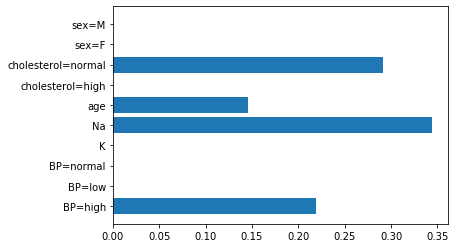

In [8]:
import matplotlib.pyplot as plt
plt.barh(range(10), dtc.feature_importances_, align='center', tick_label=vec.get_feature_names())